In [1]:
#import necessary python packages
import os
import csv
import glob
import errno
import json
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import re
from scipy.spatial import distance
from scipy.signal import find_peaks

In [108]:
class cell_segment():
        
        
    def __init__(self, parent_segment, proximal_coordinates, distal_coordinates):
        
        if parent_segment != None:
        
            self.x_prox = parent_segment.x_dist
            self.y_prox = parent_segment.y_dist
            self.z_prox = parent_segment.z_dist

            self.x_dist = distal_coordinates[0]
            self.y_dist = distal_coordinates[1]
            self.z_dist = distal_coordinates[2]
            
        else:
            self.x_prox = proximal_coordinates[0]
            self.y_prox = proximal_coordinates[1]
            self.z_prox = proximal_coordinates[2]

            self.x_dist = distal_coordinates[0]
            self.y_dist = distal_coordinates[1]
            self.z_dist = distal_coordinates[2]
        
        
    def plot(self, ax, color, label = " "):
        if label != " ":
            if (self.x_prox == self.x_dist) and (self.y_prox == self.y_dist) and (self.z_prox == self.z_dist):
                ax.scatter3D(self.x_prox, self.y_prox, self.z_prox, color, s = 100, label = label)
            else:
                ax.plot3D([self.x_prox, self.x_dist], [self.y_prox, self.y_dist], [self.z_prox, self.z_dist], color, linewidth = 5, label = label)
        else:
            if (self.x_prox == self.x_dist) and (self.y_prox == self.y_dist) and (self.z_prox == self.z_dist):
                ax.scatter3D(self.x_prox, self.y_prox, self.z_prox, color, s = 100)
            else:
                ax.plot3D([self.x_prox, self.x_dist], [self.y_prox, self.y_dist], [self.z_prox, self.z_dist], color, linewidth = 5)

<IPython.core.display.Javascript object>


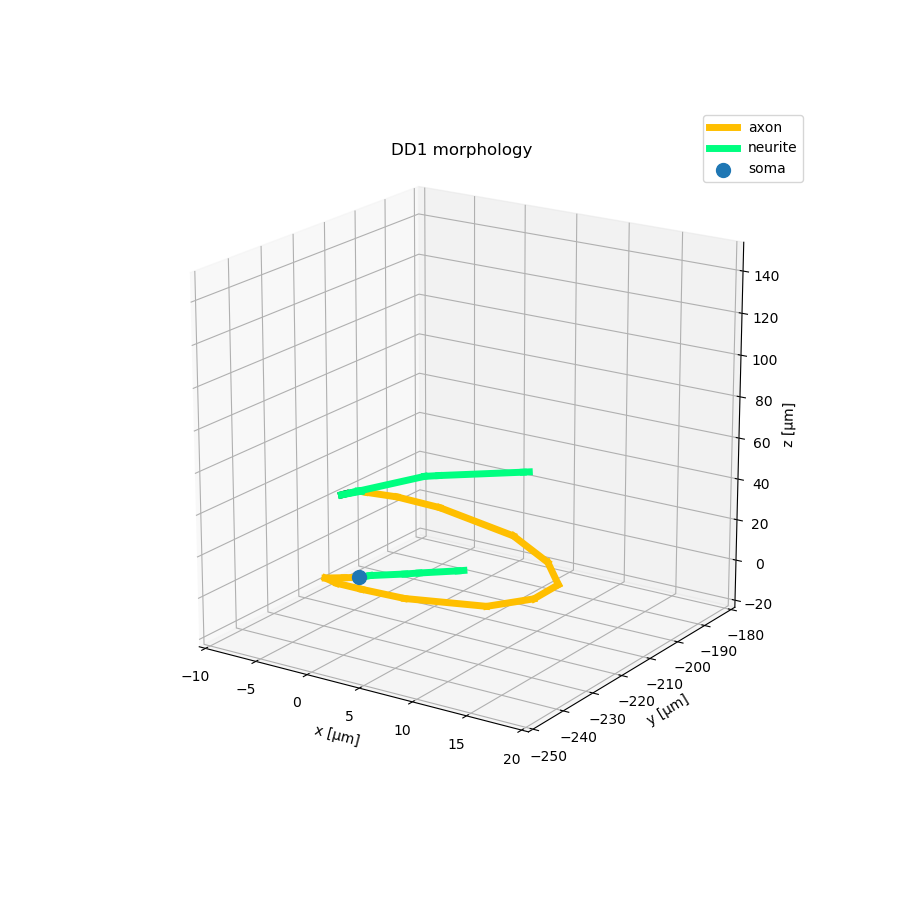

In [109]:
# 3D visualisation of proband data / gesund
# gesund
# show camera data as 3D plots for chosen proband (run twice)
%matplotlib notebook
#%matplotlib inline


# create 3D line plot
fig = plt.figure(figsize = (9,9))
#fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlim3d(-10, 20)
#ax.set_xlim3d(-300, -150)

ax.set_ylim3d(-250, -180)

#ax.set_zlim3d(0, 20)
ax.set_zlim3d(-20, 150)

ax.set_aspect('auto')
ax.set_xlabel("x [\u03BCm]") 
ax.set_ylabel("y [\u03BCm]") 
ax.set_zlabel("z [\u03BCm]") 
ax.set_title("DD1 morphology")


# define soma as sphere
soma_0 = cell_segment(None, proximal_coordinates = [-9.000000e-01, -2.319500e+02, 6.850000e+00], distal_coordinates = [-9.000000e-01, -2.319500e+02, 6.850000e+00])
soma_0.plot(ax = ax, color = "blue", label = "soma")

#define soma as cylinder 
#soma_0 = cell_segment(None, proximal_coordinates = [-9.000000e-01, -2.319500e+02, 6.850000e+00], distal_coordinates = [-9.000000e-01, -227.74881, 6.850000e+00])
#soma_0.plot(ax = ax, color = "blue")

# define axon 

axon_7 = cell_segment(None, proximal_coordinates = [-9.000000e-01, -2.319500e+02, 6.850000e+00], distal_coordinates = [-9.000000e-01, -2.331500e+02, 7.700000e+00])
axon_7.plot(ax = ax, color = "#FFBF00", label = "axon")

axon_8 = cell_segment(axon_7, None, [-9.000000e-01, -2.365500e+02, 1.020000e+01])
axon_8.plot(ax, "#FFBF00")

axon_9 = cell_segment(axon_8, None, [-9.000000e-01, -2.425500e+02, 1.470000e+01]) #81.470000e+01
axon_9.plot(ax, "#FFBF00")

axon_10 = cell_segment(axon_9, None, [5.500000e-01, -2.436000e+02, 1.470000e+01])
axon_10.plot(ax, "#FFBF00")

axon_11 = cell_segment(axon_10, None, [2.900000e+00, -2.436000e+02, 1.470000e+01])
axon_11.plot(ax, "#FFBF00")

axon_12 = cell_segment(axon_11, None, [6.975000e+00, -2.435250e+02, 1.517500e+01])
axon_12.plot(ax, "#FFBF00")

axon_13 = cell_segment(axon_12, None, [1.420000e+01, -2.421500e+02, 1.920000e+01])
axon_13.plot(ax, "#FFBF00")

axon_14 = cell_segment(axon_13, None, [1.792500e+01, -2.400500e+02, 2.560000e+01])
axon_14.plot(ax, "#FFBF00")

axon_15 = cell_segment(axon_14, None, [1.950000e+01, -2.378000e+02, 3.232500e+01])
axon_15.plot(ax, "#FFBF00")

axon_16 = cell_segment(axon_15, None, [1.792500e+01, -2.355500e+02, 3.907500e+01])
axon_16.plot(ax, "#FFBF00")

axon_17 = cell_segment(axon_16, None, [1.420000e+01, -2.334500e+02, 4.550000e+01])
axon_17.plot(ax, "#FFBF00")

axon_18 = cell_segment(axon_17, None, [6.975000e+00, -2.321000e+02, 4.952500e+01])
axon_18.plot(ax, "#FFBF00")

axon_19 = cell_segment(axon_18, None, [2.900000e+00, -2.319500e+02, 4.990000e+01])
axon_19.plot(ax, "#FFBF00")

axon_20 = cell_segment(axon_19, None, [-1.000000e-01, -2.322000e+02, 4.902500e+01])
axon_20.plot(ax, "#FFBF00")

axon_21 = cell_segment(axon_20, None, [-5.000000e-01, -2.321750e+02, 4.900000e+01])
axon_21.plot(ax, "#FFBF00")

# define dendrite 
dend_1 = cell_segment(None, [-9.000000e-01, -2.319500e+02, 6.850000e+00], [-9.000000e-01, -2.307500e+02, 6.000000e+00])
dend_1.plot(ax, "#00FF80", label = "neurite")

dend_2 = cell_segment(dend_1, None, [-1.450000e+00, -2.265000e+02, 2.850000e+00])
dend_2.plot(ax, "#00FF80")

dend_3 = cell_segment(dend_2, None, [-1.450000e+00, -2.149500e+02, -5.250000e+00])
dend_3.plot(ax, "#00FF80")

dend_4 = cell_segment(dend_3, None, [-1.450000e+00, -2.102000e+02, -8.400000e+00])
dend_4.plot(ax, "#00FF80")

dend_5 = cell_segment(dend_4, None, [-1.450000e+00, -1.968000e+02, -1.760000e+01])
dend_5.plot(ax, "#00FF80")

dend_6 = cell_segment(dend_5, None, [-1.450000e+00, -1.947500e+02, -1.895000e+01])
dend_6.plot(ax, "#00FF80")

# define neurite 
neur_22 = cell_segment(None, [-5.000000e-01, -2.321750e+02, 4.900000e+01], [-7.000000e-01, -2.325000e+02, 4.910000e+01])
neur_22.plot(ax, "#00FF80")

neur_23 = cell_segment(neur_22, None, [-7.000000e-01, -2.363500e+02, 5.060000e+01])
neur_23.plot(ax, "#00FF80")

neur_24 = cell_segment(neur_23, None, [-7.000000e-01, -2.377500e+02, 5.105000e+01])
neur_24.plot(ax, "black")

neur_25 = cell_segment(None, [-5.000000e-01, -2.321750e+02, 4.900000e+01], [-7.000000e-01, -2.377500e+02, 5.105000e+01])
neur_25.plot(ax, "#00FF80")

neur_26 = cell_segment(neur_25, None, [-7.000000e-01, -2.107500e+02, 4.070000e+01])
neur_26.plot(ax, "#00FF80")

neur_27 = cell_segment(neur_26, None, [-7.000000e-01, -2.059500e+02, 3.770000e+01])
neur_27.plot(ax, "#00FF80")

neur_28 = cell_segment(neur_27, None, [-7.000000e-01, -1.762500e+02, 1.840000e+01])
neur_28.plot(ax, "#00FF80")

neur_29 = cell_segment(neur_28, None, [-7.000000e-01, -1.740500e+02, 1.700000e+01])
neur_29.plot(ax, "#00FF80")



ax.legend()
plt.show()

<IPython.core.display.Javascript object>


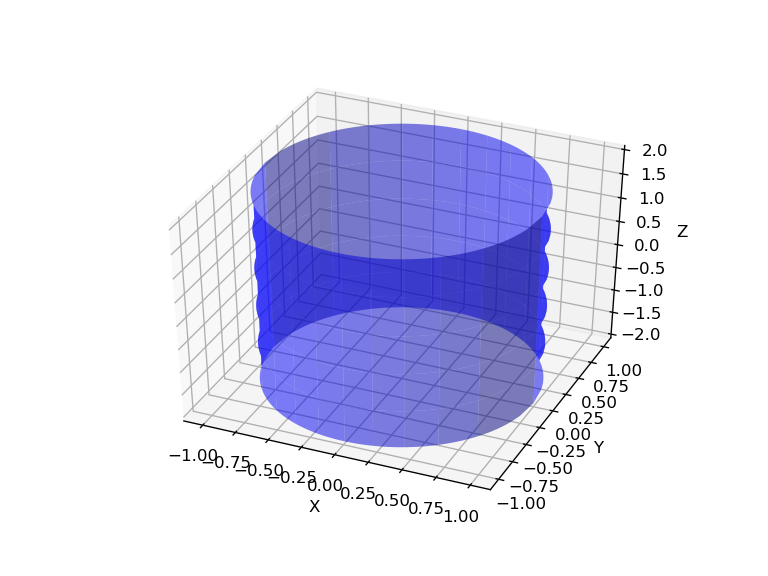

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter graph
#N = 100
#X = np.random.uniform(-1, 1, N)
#Y = np.random.uniform(-1, 1, N)
#Z = np.random.uniform(-2, 2, N)
#ax.scatter(X, Y, Z)

# Cylinder
x=np.linspace(-1, 1, 100)
z=np.linspace(-2, 2, 100)
Xc, Zc=np.meshgrid(x, z)
Yc = np.sqrt(1-Xc**2)

# Draw parameters
rstride = 20
cstride = 10
ax.plot_surface(Xc, Yc, Zc, alpha=0.5, rstride=rstride, cstride=cstride, color = "blue")
ax.plot_surface(Xc, -Yc, Zc, alpha=0.5, rstride=rstride, cstride=cstride, color = "blue")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()